# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Gorentla Priyanka

https://github.com/gpriyankav/article-summarizer

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [79]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed by Priyanka Gorentla.')

Package                       Version
----------------------------- --------------------
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
asgiref                       3.5.2
asteval                       0.9.31
astroid                       2.11.7
astropy                       5.1
async-lru                     2.0.4
atomicwrites                  1.4.0
attrs                         23.1.0
Automat                       20.2.0
autopep8                      2.0.2
Babel                         2.12.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1


Q1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [80]:
import requests
import pickle

url = "https://www.forbes.com/sites/chloesorvino/2022/09/02/us-farmers-struggle-through-drought-to-bring-food-to-the-table-but-face-more-challenges-ahead/?sh=1df4b5c7fc08"

try:
    response = requests.get(url)
    if response.status_code == 200:
        blog_html = response.text
        soup = BeautifulSoup(blog_html, "html.parser")
        article = soup.find("article")

        with open("farmer.pkl", "wb") as f:
            pickle.dump(str(article), f)
        print("Article HTML has been successfully extracted and saved to 'farmer.pkl'.")
    else:
        print("Failed to fetch the content. Status code:", response.status_code)
except requests.exceptions.RequestException as e:
    print("Error:", e)

Article HTML has been successfully extracted and saved to 'farmer.pkl'.


Q2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [81]:
import pickle
from bs4 import BeautifulSoup
from textblob import TextBlob
import spacy

nlp = spacy.load("en_core_web_sm")

try:
    with open("farmer.pkl", "rb") as f:
        blog_html = pickle.load(f)
        
    soup = BeautifulSoup(blog_html, "html.parser")
    blog_text = soup.get_text()
    
    print(blog_text)
except FileNotFoundError:
    print("The 'farmer.pkl' file was not found.")
except Exception as e:
    print("Error:", e)

# Process the article text
res = TextBlob(blog_text)
print(f"Polarity: {res.sentiment.polarity}")
doc = nlp(blog_text)
num_sentences = len(list(doc.sents))
print(f"Number of Sentences: {num_sentences}")

Edit StoryFood & DrinkDaily CoverU.S. Farmers Struggle Through Drought To Bring Food To The Table But Face More Challenges AheadThe drought has dragged on for a long time. Last year, orchard farmers in California's Central Valle... [+]The drought has dragged on for a long time. Last year, orchard farmers in California's Central Valley destroyed trees that were dying due to lack of water. This year, many more farmers did the same. [-] Justin Sullivan/Getty ImagesChloe SorvinoForbes StaffI lead Forbes coverage of food and agriculture.FollowingSep 2, 2022,06:30am EDT|Share to FacebookShare to TwitterShare to LinkedinThe drought has dragged on for a long time. Last year, orchard farmers in California's Central Valley destroyed trees that were dying due to lack of water. This year, many more farmers did the same.

Extreme weather and high fuel prices have been daunting obstacles for American food producers, but the good news is wheat and soy yields are up compared with last year.
By Chloe S

Q3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [82]:
import pickle
import spacy
# Load the article text from the file
try:
    with open("farmer.pkl", "rb") as f:
        blog_html = pickle.load(f)
except FileNotFoundError:
    print("The 'farmer.pkl' file was not found.")
    exit()

# Load the English spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Process the article text with spaCy
doc = nlp(blog_text)

# Function to filter out unwanted tokens
def is_token_valid(token):
    return not (token.is_stop or token.is_space or token.is_punct)

# Filter and convert tokens to lowercase
filtered_tokens = [token.text.lower() for token in doc if is_token_valid(token)]

# Calculate token frequencies
token_freq = Counter(filtered_tokens)

# Get the 5 most frequent tokens
most_common_tokens = token_freq.most_common(5)

# Print the common tokens with their frequencies
print("5 Most Frequent Tokens:")
for token, frequency in most_common_tokens:
     print(f"{token}: {frequency} occurrences")

5 Most Frequent Tokens:
year: 19 occurrences
farmers: 16 occurrences
drought: 15 occurrences
fulton: 15 occurrences
water: 9 occurrences


Q4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [83]:
import pickle
import spacy

# Lemmatize and convert tokens to lowercase
lemmas = [token.lemma_.lower() for token in doc if is_token_valid(token)]

# Calculate lemma frequencies
lemma_freq = Counter(lemmas)

# Get the 5 most frequent lemmas
most_common_lemmas = lemma_freq.most_common(5)

# Print the common lemmas with their frequencies
print("5 Most Frequent Lemmas:")
for lemma, frequency in most_common_lemmas:
    print(f"{lemma}: {frequency} occurrences")

5 Most Frequent Lemmas:
year: 23 occurrences
farmer: 18 occurrences
drought: 15 occurrences
fulton: 15 occurrences
say: 11 occurrences


Q5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

Score of the first sentence by frequent tokens: 0.13793103448275862
Score of the first sentence by frequent lemma: 0.27586206896551724


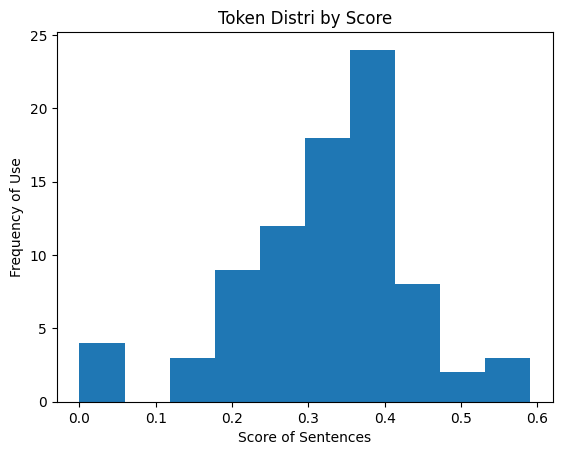

In [84]:
token_scores = []
import pickle
from bs4 import BeautifulSoup

def score_sentence_by_token(sentence, interesting_tokens):
    total_words = len([token for token in sentence])
    interesting_count = len([token.text.lower() for token in sentence if token.text in interesting_tokens])
    return interesting_count / total_words
sentences = list(doc.sents)
token_score = score_sentence_by_token(sentences[0], token_freq)
print(f"Score of the first sentence by frequent tokens:", token_score)

def score_sentence_by_lemma(sentence, interesting_lemmas):
    total_words = len([word for word in sentence])
    interesting_count = len([token.lemma_.lower() for token in sentence if token.lemma_ in interesting_lemmas])
    return interesting_count / total_words
sentences1 = list(doc.sents)
lemma_score = score_sentence_by_lemma(sentences1[0], lemma_freq)
print(f"Score of the first sentence by frequent lemma:", lemma_score)

with open("farmer.pkl", "rb") as f:
        blog_html = pickle.load(f)
        
soup = BeautifulSoup(blog_html, "html.parser")
blog_text = soup.get_text()
    
# Load the English spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Process the article text with spaCy
doc = nlp(blog_text)

for sentence in list(doc.sents):
    score = score_sentence_by_token(sentence, token_freq)
    token_scores.append(score)
    
# Plot Score Distributions

plt.hist(token_scores)
plt.title('Token Distri by Score')
plt.xlabel('Score of Sentences')
plt.ylabel('Frequency of Use')
plt.show()

## The most common range by token is between 0.35 and 0.40.

Q6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

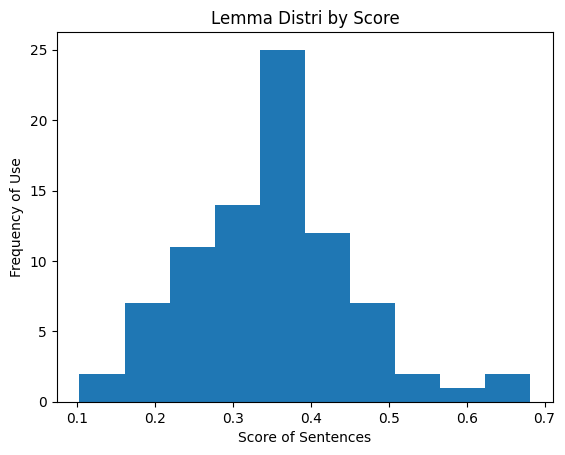

In [85]:
lemma_scores = []
for sentence in list(doc.sents):
    score = score_sentence_by_lemma(sentence, lemma_freq)
    lemma_scores.append(score)
    
# Plot Score Distributions

plt.hist(lemma_scores)
plt.title('Lemma Distri by Score')
plt.xlabel('Score of Sentences')
plt.ylabel('Frequency of Use')
plt.show()
## The most common range by lemma is between 0.35 and 0.40.

Q7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens):6
* Cutoff Score (lemmas):9

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

Q8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [86]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

# Load spaCy pipeline and SpaCyTextBlob extension
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob")

# Extract sentences from the article (replace this with your own code)
sentences = nlp(blog_text).sents

# Create an empty list to store sentences for the summary
sentence_list = []

# Iterate through each sentence in the article
for sentence in sentences:
    # Calculate the score for the sentence based on tokens
    score = score_sentence_by_token(sentence, token_freq)
    
    # Set the cutoff score for tokens
    cutoff_score_tokens = 6
    
    # If the score is greater than the cutoff score, add the sentence to the summary list
    if score > cutoff_score_tokens:
        sentence_list.append(sentence)

# Generate the summary text by joining the sentences in
result = ' '.join(sentence_list)
print(result)

Q9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [87]:
blob_tokens = nlp(result)
print('Polarity of the token summarized article is', blob_tokens._.blob.polarity)

Polarity of the token summarized article is 0.0


In [88]:
import spacy
nlp = spacy.load("en_core_web_sm")
num_sentences = len(list(blob_tokens.sents))
print(f"Number of Sentences: {num_sentences}")

Number of Sentences: 0


Q10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [89]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

# Load spaCy pipeline and SpaCyTextBlob extension
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob")

# Extract sentences from the article (replace this with your own code)
sentences = nlp(blog_text).sents

# Create an empty list to store sentences for the summary
sentence_list = []

# Iterate through each sentence in the article
for sentence in sentences:
    # Calculate the score for the sentence based on tokens
    score = score_sentence_by_token(sentence, lemma_freq)
    
    # Set the cutoff score for tokens
    cutoff_score_lemmas = 9
    
    # If the score is greater than the cutoff score, add the sentence to the summary list
    if score > cutoff_score_lemmas:
        sentence_list.append(sentence)

# Generate the summary text by joining the sentences in
resultl = ' '.join(sentence_list)
print(resultl)

Q11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [90]:
blob_lemma = nlp(resultl)
print('Polarity of the lemma summarized article is', blob_lemma._.blob.polarity)

Polarity of the lemma summarized article is 0.0


In [91]:
import spacy
nlp = spacy.load("en_core_web_sm")
num_sentences = len(list(blob_lemma.sents))
print(f"Number of Sentences: {num_sentences}")

Number of Sentences: 0


Q12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  I see difference in polarity scores of summaries to the intial article which is 0.15 and later i got 0. Summarizing algorithms reduce information, context, and complexity, which may alter text sentiment. The summary' selected sentences may not accurately represent the text's sentiment, therefore polarity scores may vary.

Q13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be? I don't see any differences in polarities of tokens and lemmas